In [2]:
import grafiti as gf
import cellcharter as cc
from utag import utag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import squidpy as sq
import scanpy as sc
import scvi
import seaborn as sns
from scipy.stats import norm
import random
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score, mutual_info_score
import warnings
warnings.filterwarnings("ignore")

# Scenario 3 synthetic

In [5]:
def generate_synthetic_dataset(
    num_cells=2000,
    cluster_probability=0.5,
    cluster_size=100,
    cluster_radius=0.01,
    marker_means_A=(0.3, 0.8), 
    marker_means_B=(0.8, 0.3),
    marker_SDs_A=(0.1, 0.1), 
    marker_SDs_B=(0.1, 0.1),
    dispersed_distance=0.05,
    num_markers=4,
    seed=25):

    random.seed(seed)
    np.random.seed(seed)
    
    # Generate unique x and y coordinates for all cells in the range [0, 1)
    x = np.random.rand(num_cells)
    y = np.random.rand(num_cells)

    # Generate topology (clustered or dispersed) based on x and y coordinates
    topology = np.where(np.random.rand(num_cells) < cluster_probability, 'clustered', 'dispersed')

    # Adjust x and y coordinates for clustered cells
    clustered_indices = np.where(topology == 'clustered')[0]
    for i in range(0, len(clustered_indices), cluster_size):
        cluster_x = np.random.normal(loc=x[clustered_indices[i]], scale=cluster_radius,
                                      size=min(cluster_size, len(clustered_indices) - i))
        cluster_y = np.random.normal(loc=y[clustered_indices[i]], scale=cluster_radius,
                                      size=min(cluster_size, len(clustered_indices) - i))

        # Clip the generated coordinates to ensure they are within [0, 1)
        cluster_x = np.clip(cluster_x, 0, 1)
        cluster_y = np.clip(cluster_y, 0, 1)

        # Filter out indices where the generated coordinates are too close to existing clustered cells
        valid_indices = np.where(
            (np.abs(cluster_x - x[clustered_indices[i:i + cluster_size]]) > cluster_radius) |
            (np.abs(cluster_y - y[clustered_indices[i:i + cluster_size]]) > cluster_radius))[0]

        # Update only the valid indices with the new coordinates
        x[clustered_indices[i:i + cluster_size][valid_indices]] = cluster_x[valid_indices]
        y[clustered_indices[i:i + cluster_size][valid_indices]] = cluster_y[valid_indices]

    # Adjust x and y coordinates for dispersed cells based on clustered cells
    dispersed_indices = np.where(topology == 'dispersed')[0]
    for i in dispersed_indices:
        # Check if the dispersed cell is within a specified distance of any clustered cell
        while any(
                np.sqrt((x[i] - x[clustered_indices]) ** 2 + (y[i] - y[clustered_indices]) ** 2) < dispersed_distance):
            # If the dispersed cell is too close to a cluster, generate new coordinates
            x[i] = np.random.uniform(low=0, high=1)
            y[i] = np.random.uniform(low=0, high=1)

    # Assign cell types based on coordinates
    celltype_A_mask = (x < 0.5) & (y >= 0) & (y <= 1)
    celltype_B_mask = (x >= 0.5) & (y >= 0) & (y <= 1)

    # Generate marker values using bimodal distribution for each marker
    markers = []
    for i in range(num_markers):
        # Determine the upregulated and downregulated cell types
        upregulated_celltype = 'celltype_B' if i % 2 == 0 else 'celltype_A'
        downregulated_celltype = 'celltype_A' if i % 2 == 0 else 'celltype_B'
        
        # Generate values for the upregulated cell type
        upregulated_values = np.clip(np.random.normal(loc=marker_means_A[i % 2], scale=marker_SDs_A[i % 2], size=num_cells), 0, 1)
        
        # Generate values for the downregulated cell type
        downregulated_values = np.clip(np.random.normal(loc=marker_means_B[i % 2], scale=marker_SDs_B[i % 2], size=num_cells), 0, 1)
        
        # Combine values based on the cell type
        marker_values = np.where(celltype_A_mask, upregulated_values, downregulated_values)
        markers.append(marker_values)

    # Create a DataFrame to store the synthetic dataset
    data_dict = {'x': x, 
                 'y': y, 
                 'celltype': np.where(celltype_A_mask, 'celltype_A', 'celltype_B'), 
                 'topology': topology}
    for i in range(num_markers):
        data_dict[f'marker_{i+1}'] = markers[i]

    synthetic_data = pd.DataFrame(data_dict)

    return synthetic_data

0


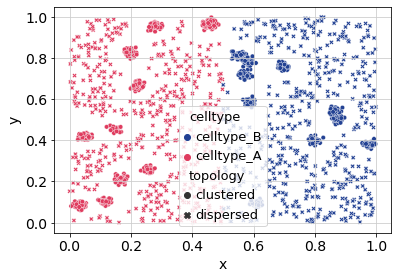

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!
Epoch 0 ** iteration 0 ** Loss: 16501.84765625
Epoch 50 ** iteration 50 ** Loss: 12813.91634765625
Epoch 100 ** iteration 100 ** Loss: 1619.2180513238907
Epoch 150 ** iteration 150 ** Loss: 1.3536214637756347


Global seed set to 12345
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Complete.
Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.75it/s, v_num=1, train_loss_step=3.21, train_loss_epoch=3.28]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.25it/s, v_num=1, train_loss_step=3.21, train_loss_epoch=3.28]
Applying UTAG Algorithm...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying Leiden Clustering at Resolution: 0.33...


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


1


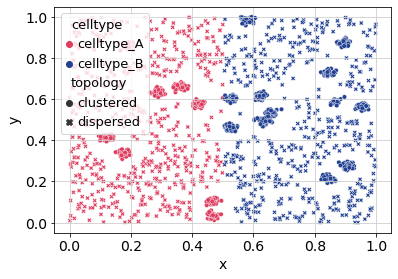

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!
Epoch 0 ** iteration 0 ** Loss: 16958.49609375
Epoch 50 ** iteration 50 ** Loss: 13205.3177734375
Epoch 100 ** iteration 100 ** Loss: 1899.2227867650986
Epoch 150 ** iteration 150 ** Loss: 1.1477610731124879


Global seed set to 12345
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Complete.
Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.28it/s, v_num=1, train_loss_step=3.31, train_loss_epoch=3.28]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.23it/s, v_num=1, train_loss_step=3.31, train_loss_epoch=3.28]
Applying UTAG Algorithm...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying Leiden Clustering at Resolution: 0.33...


100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


2


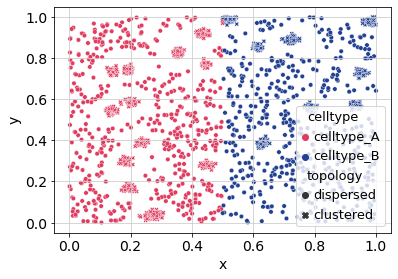

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!
Epoch 0 ** iteration 0 ** Loss: 17483.6953125
Epoch 50 ** iteration 50 ** Loss: 8650.341948595047
Epoch 100 ** iteration 100 ** Loss: 1.6524476742744445
Epoch 150 ** iteration 150 ** Loss: 0.7284426605701446


Global seed set to 12345
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Complete.
Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.57it/s, v_num=1, train_loss_step=3.31, train_loss_epoch=3.29]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.21it/s, v_num=1, train_loss_step=3.31, train_loss_epoch=3.29]
Applying UTAG Algorithm...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Applying Leiden Clustering at Resolution: 0.33...


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


3


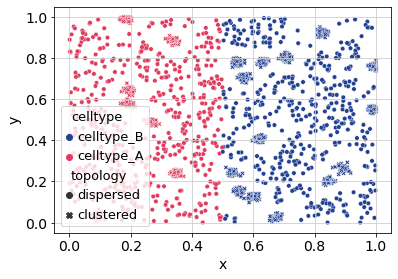

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!
Epoch 0 ** iteration 0 ** Loss: 474843936.0
Epoch 50 ** iteration 50 ** Loss: 345164134.08
Epoch 100 ** iteration 100 ** Loss: 155520354.24
Epoch 150 ** iteration 150 ** Loss: 48718719.04


Global seed set to 12345
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Complete.
Epoch 60/400:  15%|█▍        | 59/400 [00:14<01:16,  4.43it/s, v_num=1, train_loss_step=4.61, train_loss_epoch=4.61]Applying UTAG Algorithm...


Exception ignored in: <function _releaseLock at 0x7f4d3ba808b0>
Traceback (most recent call last):
  File "/home/pourmalm/ondconda/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

Applying Leiden Clustering at Resolution: 0.33...



100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


4


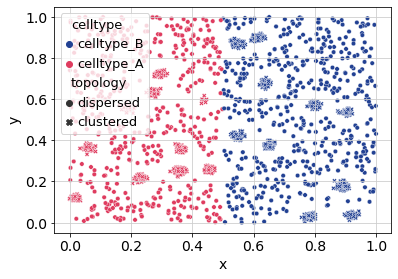

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!
Epoch 0 ** iteration 0 ** Loss: 30353.48828125
Epoch 50 ** iteration 50 ** Loss: 24017.3465625
Epoch 100 ** iteration 100 ** Loss: 1387.0929055023194
Epoch 150 ** iteration 150 ** Loss: 3.203458597660065


Global seed set to 12345
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Complete.
Epoch 7/400:   2%|▏         | 6/400 [00:01<01:34,  4.19it/s, v_num=1, train_loss_step=5.56, train_loss_epoch=5.84]Applying UTAG Algorithm...


Process ForkPoolWorker-1186:
Exception ignored in: <function _releaseLock at 0x7f4d3ba808b0>
Traceback (most recent call last):
  File "/home/pourmalm/ondconda/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 366, in get
    res = self._reader.recv_bytes()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/connection.py", line 221, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/connectio

Traceback (most recent call last):
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


  0%|          | 0/1 [00:00<?, ?it/s]

Process ForkPoolWorker-1246:
Process ForkPoolWorker-1256:
Process ForkPoolWorker-1225:
Process ForkPoolWorker-1244:
Process ForkPoolWorker-1254:
Process ForkPoolWorker-1231:
Process ForkPoolWorker-1242:
Process ForkPoolWorker-1235:
Process ForkPoolWorker-1227:
Process ForkPoolWorker-1223:
Process ForkPoolWorker-1240:
Process ForkPoolWorker-1239:
Process ForkPoolWorker-1252:
Process ForkPoolWorker-1232:
Process ForkPoolWorker-1241:
Process ForkPoolWorker-1233:
Process ForkPoolWorker-1234:
Process ForkPoolWorker-1226:
Process ForkPoolWorker-1230:
Process ForkPoolWorker-1245:
Process ForkPoolWorker-1250:
Process ForkPoolWorker-1243:
Process ForkPoolWorker-1249:
Process ForkPoolWorker-1224:
Process ForkPoolWorker-1251:
Process ForkPoolWorker-1202:
Process ForkPoolWorker-1255:
Process ForkPoolWorker-1248:
Process ForkPoolWorker-1237:
Process ForkPoolWorker-1257:
Process ForkPoolWorker-1238:
Process ForkPoolWorker-1229:
Process ForkPoolWorker-1247:
Process ForkPoolWorker-1218:
Process ForkPo

KeyboardInterrupt: 

Process ForkPoolWorker-1220:
Process ForkPoolWorker-1199:
Process ForkPoolWorker-1196:
Traceback (most recent call last):
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process ForkPoolWorker-1236:
Process ForkPoolWorker-1219:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most

  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/po

  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/pytho

  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:

  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.py", line 366, in get
    res = self._reader.recv_bytes()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/queues.p

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/pourmalm/ondconda/lib/python3.9/multiprocessing/connection.py", line 384, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt


In [35]:
columns = ['run', 'grafiti', 'cellcharter', 'utag']
synthetic_iter = pd.DataFrame(columns=columns)
for i in range(100):
    print(i)
    synthetic_dataset = generate_synthetic_dataset(num_cells=2000,
                                                   cluster_probability=0.5,
                                                   cluster_size=50,
                                                   cluster_radius=0.01,
                                                   marker_means_A=(0.3, 0.8),
                                                   marker_means_B=(0.8, 0.3),
                                                   marker_SDs_A=(0.1, 0.1),
                                                   marker_SDs_B=(0.1, 0.1),
                                                   dispersed_distance=0.05,
                                                   num_markers=4,
                                                   seed=i)
    sns.scatterplot(x=synthetic_dataset['x'], y=synthetic_dataset['y'], hue=synthetic_dataset['celltype'], s=20, 
                    palette={'celltype_A':'#df3c5f', 'celltype_B':'#224193'}, style=synthetic_dataset["topology"])
    plt.show()
    synthetic_dataset["fov"] = "FOV1"
    synthetic_dataset["fov"] = synthetic_dataset["fov"].astype("category")
    synthetic_dataset['true_label'] = synthetic_dataset['celltype'] + '_' + synthetic_dataset['topology']
    features = ["marker_1", "marker_2", "marker_3", "marker_4"]
    obs_features = ["x", "y", "celltype", "topology", "true_label", "fov"]
    adata = anndata.AnnData(X = synthetic_dataset[features].to_numpy(), obs = synthetic_dataset[obs_features])
    adata.var_names = synthetic_dataset[features].columns
    adata.obsm['spatial'] = adata.obs[["x","y"]].to_numpy()
    sq.gr.spatial_neighbors(adata,radius=10,coord_type='generic',delaunay=True,library_key="fov")
    gae = gf.ml.GAE(adata, layers=[10], lr=0.1, distance_threshold=0.08)
    gae.train(200, update_interval=50)
    gae.load_embedding(adata,encoding_key="X_grafiti")
    scvi.settings.seed = 12345
    scvi.model.SCVI.setup_anndata(adata,batch_key='fov')
    model = scvi.model.SCVI(adata)
    model.train(early_stopping=True, enable_progress_bar=True)
    adata.obsm['X_scVI'] = model.get_latent_representation(adata).astype(np.float32)
    utag_results = utag(adata,slide_key="fov",max_dist=15,normalization_mode='l1_norm',apply_clustering=True,
        clustering_method = 'leiden', resolutions = [0.33])
    dbs_gf = davies_bouldin_score(adata.obsm['X_grafiti'], adata.obs["true_label"])
    dbs_cc = davies_bouldin_score(adata.obsm['X_scVI'], adata.obs["true_label"])
    dbs_ut = davies_bouldin_score(utag_results.obsm['X_pca'], utag_results.obs["true_label"])
    synthetic_iter = synthetic_iter.append({'run': i,
                    'grafiti': dbs_gf,
                    'cellcharter': dbs_cc,
                    'utag': dbs_ut}, ignore_index=True)

In [36]:
synthetic_iter

,run,grafiti,cellcharter,utag
0,0.0,1.346948,114.660403,82.310383
1,1.0,1.562562,52.492036,54.053970
2,2.0,1.650883,53.007657,42.231768
3,3.0,1.316688,47.939429,32.493407


## Final comparison

KeyError: 'cc'

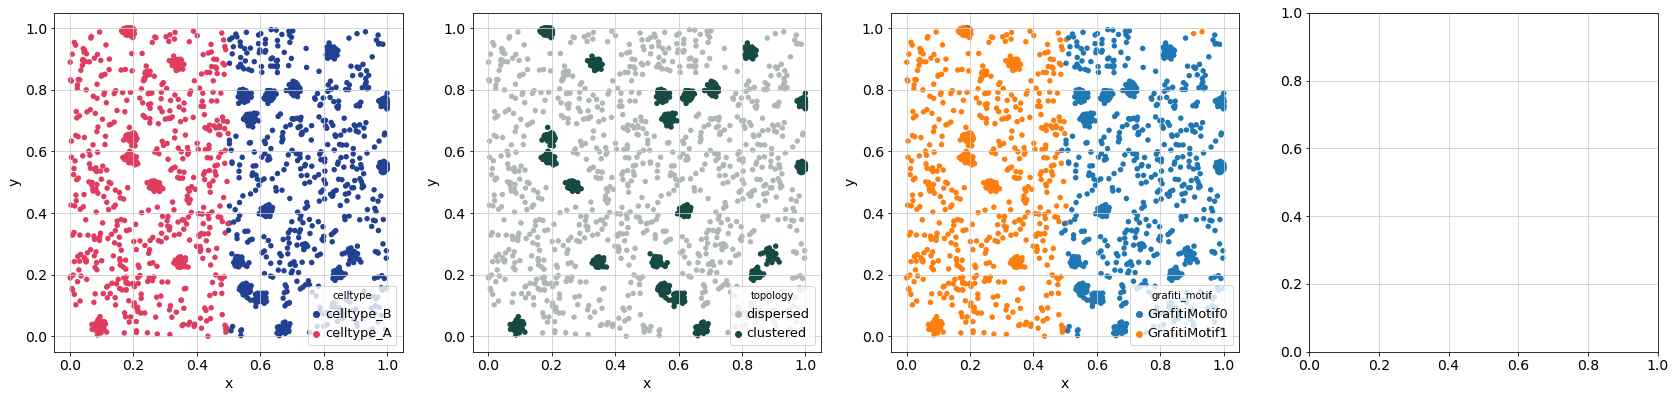

In [24]:
plt.figure(figsize=(36, 6))
plt.subplot(1, 5, 1)
sns.scatterplot(x=adata.obs['x'], y=adata.obs['y'], hue=adata.obs['celltype'], s=30, linewidth=0.001, palette={'celltype_A':'#df3c5f', 'celltype_B':'#224193'})
plt.subplot(1, 5, 2)
sns.scatterplot(x=adata.obs['x'], y=adata.obs['y'], hue=adata.obs['topology'], s=30, linewidth=0.001, palette={'clustered':'#184A45FF', 'dispersed':'#B0B8B4FF'})
plt.subplot(1, 5, 3)
sns.scatterplot(x=adata.obs['x'], y=adata.obs['y'], hue=adata.obs['grafiti_motif'], s=30, linewidth=0.001)
plt.subplot(1, 5, 4)
sns.scatterplot(x=adata.obs['x'], y=adata.obs['y'], hue=adata.obs['cc'], s=30, linewidth=0.001)
plt.subplot(1, 5, 5)
sns.scatterplot(x=utag_results.obs['x'], y=utag_results.obs['y'], hue=utag_results.obs['UTAG Label_leiden_0.33'], s=30, linewidth=0.001)

In [25]:
adata

AnnData object with n_obs × n_vars = 2000 × 4
    obs: 'x', 'y', 'celltype', 'topology', 'fov', 'grafiti_motif', '_scvi_batch', '_scvi_labels'
    uns: 'spatial_neighbors', 'neighbors', 'umap', 'grafiti_neighbors', 'leiden', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'spatial', 'X_grafiti', 'X_umap'
    obsp: 'spatial_connectivities', 'spatial_distances', 'distances', 'connectivities', 'grafiti_neighbors_distances', 'grafiti_neighbors_connectivities'